In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm

%matplotlib inline

## Data Loading

In [36]:
data = pd.read_csv('Titanic-Dataset.csv')

In [37]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Understanding

In [38]:
# Mengecek jumlah data yang duplikat
print("Jumlah data duplikat:", data.duplicated().sum())


Jumlah data duplikat: 0


In [39]:
# Mengecek missing value
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
data['Title'] = data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
data.insert(loc=12, column='Title', value=data.pop('Title'))

In [41]:
# transformasi title penumpang
title_map = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Johkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Royalty",
    "Rev": "Officer",
    "The Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mile": "Miss",
    "Mr": "Mr",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
}

data["Title"] = data.Title.map(title_map)

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Title
Mr         517
Miss       182
Master      40
Officer     11
Royalty     10
Mrs          1
Name: count, dtype: int64

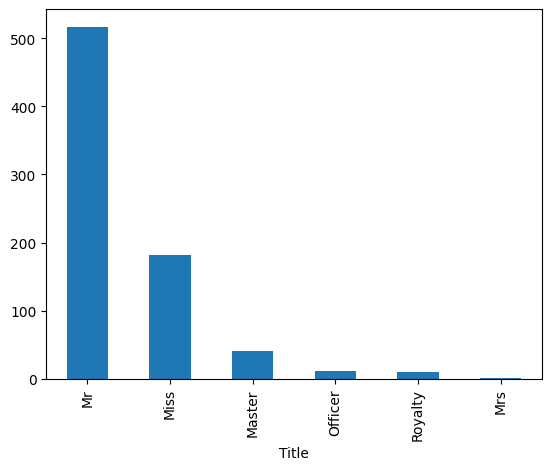

In [43]:
# cek jumlah data masing-masing title
data["Title"].value_counts().plot(kind='bar')
data['Title'].value_counts()

In [44]:
data["Title"].isnull().sum()

130

In [45]:
data.loc[data["Title"].isnull() & (data["Sex"] == 'male'), "Title"] = 'Mr'
data.loc[data["Title"].isnull() & (data["Sex"] == 'female'), "Title"] = 'Mrs'

In [46]:
data["Title"].isnull().sum()

0

In [47]:
data["Age"].isnull().sum()

177

In [48]:
# Pengelompokan umur penumpang
def passenger_type(row):
    if row['Age'] <= 2:
        return "Infant"
    elif 2 < row['Age'] < 12:
        return "Child"
    elif 12 <= row['Age'] < 18:
        return "Youth"
    elif 18 <= row['Age'] < 65:
        return "Adult"
    elif row['Age'] >= 65:
        return "Senior"
    elif row['Title'] == "Master":
        return "Child"
    elif row['Title'] == "Miss":
        return "Child"
    elif row['Title'] == "Mr" or row['Title'] == "Mrs":
        return "Adult"
    else:
        return "Unknown"

In [49]:
# Ekstrak kelompok umur lalu dimasukkan di dalam atribut PassengerType
data['PassengerType'] = data.apply(lambda row: passenger_type(row), axis=1)

In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult


PassengerType
Adult      726
Child       84
Youth       45
Infant      24
Senior      11
Unknown      1
Name: count, dtype: int64

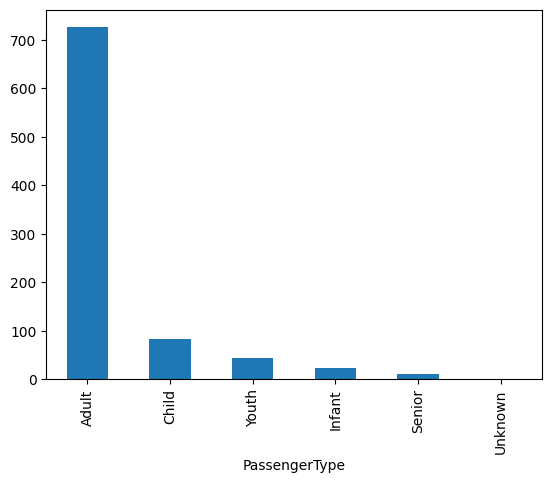

In [51]:
# Cek jumlah masing-masing kelompok umur
data['PassengerType'].value_counts().plot(kind='bar')
data['PassengerType'].value_counts()

## Data Preparation

In [52]:
# Manual encoding
sex_map = {"male": 1, "female": 0}
data["Sex"] = data["Sex"].map(sex_map)

In [53]:
data.head( )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult


In [54]:
# Manual encoding - mapping pada atribut PassengerType
passenger_type_map = {"Unknown": 0, "Infant": 1, "Child": 2, "Youth": 3, "Adult": 4, "Senior": 5}
data["PassengerType"] = data["PassengerType"].map(passenger_type_map)

In [55]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4


In [56]:
# PEMILIHAN FITUR/ATRIBUT
def titanic_corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

In [57]:
# Memilih hanya kolom numerik untuk menghitung korelasi
correlation = data.select_dtypes(include=['number']).corr()

In [58]:
# Menampilkan hasil korelasi
correlation

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,PassengerType
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,0.034205
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.164330
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.185419
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.214897
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.668850
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.387657
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.320995
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.024759
PassengerType,0.034205,-0.164330,-0.185419,0.214897,0.668850,-0.387657,-0.320995,0.024759,1.000000


### Visualisai Korelasi antar Fitur

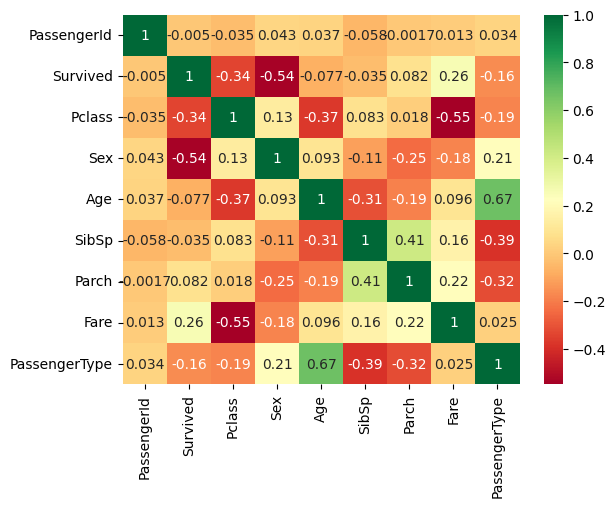

In [59]:
sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
plt.show()

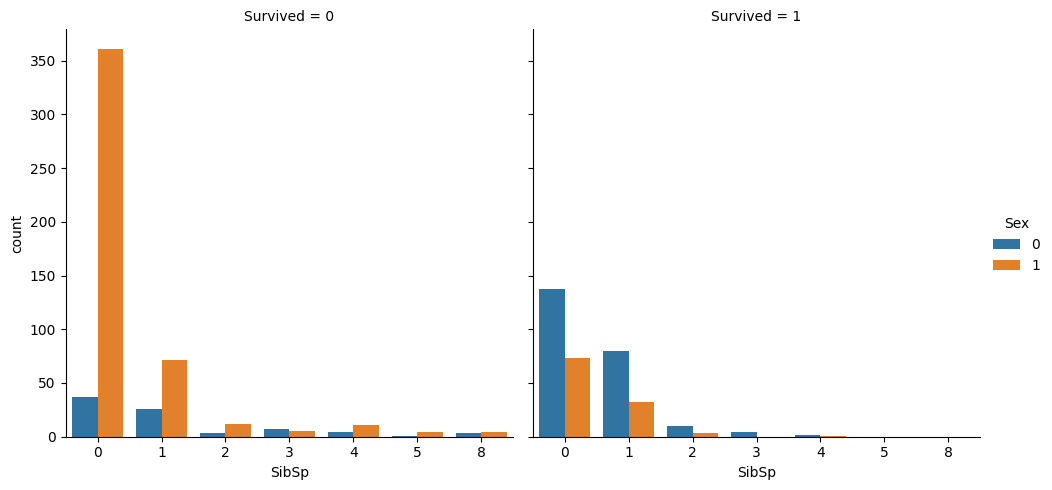

In [60]:
# Analisis korelasi terhadap fitur Survived
# Korelasi SibSp dengan Survived

sns.catplot(x="SibSp", col="Survived", data=data, hue="Sex", kind="count")
plt.show()


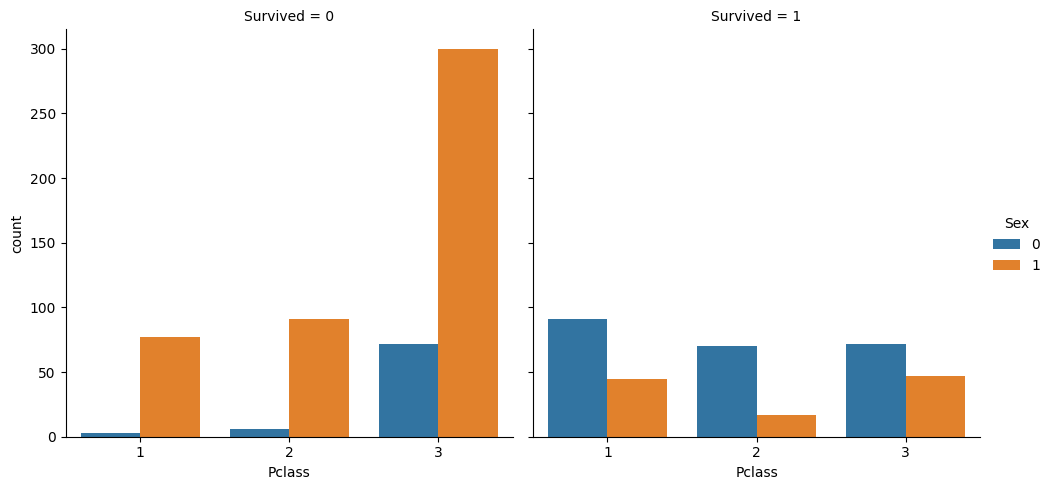

In [61]:
# Korelasi Pclass dengan Survived
sns.catplot(x="Pclass", col="Survived", data=data, hue="Sex", kind="count")
plt.show()

In [62]:
# Menghapus atribut
# Hapus fitur 'Cabin' karena terlalu banyak missing values
# Hapus fitur 'PassengerId' dan 'Ticket' karena tidak informatif
data.drop(labels=["Cabin", "PassengerId", "Ticket"], axis=1, inplace=True)

In [63]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,PassengerType
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,Mr,4
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,Mrs,4
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,Miss,4
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,Mrs,4
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,Mr,4
